In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6

# Evaluation for OI-25d-09
nur MCBJ, low impedance setup
## unbroken

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(base eva) Available measurements:
- "vna_frequencies_1.000V"
(base) Frequency Study (1.0V)
(base eva) Measurement keys preview: ['no_irradiation', 'vna_1.0000GHz_1.000V', 'vna_9.8000GHz_1.000V', 'vna_9.9000GHz_1.000V']


Frequency Study (1.0V)


100%|██████████| 191/191 [00:05<00:00, 37.07it/s]
(iv plot) smoothing = False
(iv plot) window_length = 40
(base plot) saveFigure()
(base plot) saveFigure()


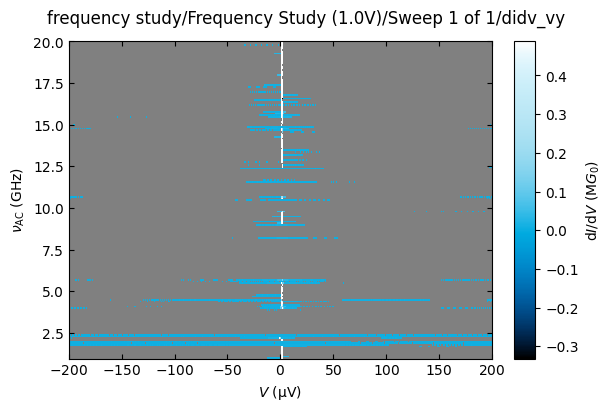

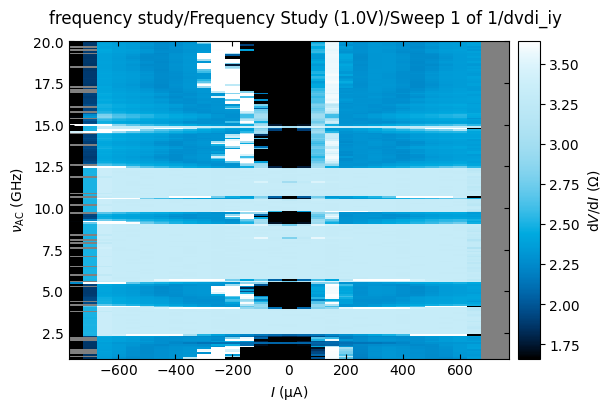

In [29]:
# Evaluation for unbroken
from utilities.ivplot import IVPlot
from utilities.ivevaluation import IVEvaluation
importlib.reload(sys.modules["utilities.ivplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

eva = IVEvaluation()
eva = IVPlot()
# /Users/oliver/Documents/measurement data/25 06 OI-25d-09/unbroken
eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "25 06 OI-25d-09/unbroken/"
eva.file_name = "OI-25d-09 2025-06-16 unbroken 3.hdf5"
eva.setAmplifications(1000, 100)
eva.setV(.2e-3, voltage_bins=2000)
eva.setI(.75e-3, current_bins=30)
eva.reference_resistor = 100
eva.showMeasurements()

# eva.upsample_voltage = 1
# eva.upsample_current = 1
eva.downsample_frequency = 43

eva.eva_temperature = False

# Frequency Study (1.0V)
eva.title = "Frequency Study (1.0V)"
print(eva.title)
eva.sub_folder = "frequency study"

eva.setMeasurement("vna_frequencies_1.000V")
eva.showKeys()
eva.setKeys(index_0=4, index_1=-10, norm=1e9, to_pop="no_irradiation")
# (a,b,c,d,e,f,g,h,i,j,k,l) = eva.getMaps(trigger_indices = [1,2,3,4,5,6,7,8,9,10,11,12])
# eva.all = eva.getMaps(trigger_indices = [1,2,3,4,5,6,7,8,9,10,11,12])
eva.all = eva.getMaps(trigger_indices = [1])

eva.plot_T = False
eva.smoothing = False
eva.window_length = 40
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
eva.dvdi_norm = (1e0, '')

for i, s in enumerate(eva.all):
    eva.to_plot = s
    eva.title_of_plot = f"Sweep {i+1} of {len(eva.all)}"
    eva.plot_all()

# eva.saveData()


# plt.close("all")

# eva.loadData()
# eva.to_plot = eva.up_sweep
# eva.title_of_plot = "Up Sweep"
# eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
# eva.dvdi_norm = (1e0, '')
# eva.smoothing = True
# eva.window_length = 40
# eva.plot_all()